<a href="https://colab.research.google.com/github/jgamiranda/MVP2_PUCRIO/blob/main/MVP_Base_de_Dados_(JM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Sprint Banco de Dados

Dataset utilizado:
Orçamento de Arrecadação da União Federal para os exercícios de 2022 e 2023 (https://portaldatransparencia.gov.br/receitas?ano=2022)

Objetivo:
Entender se o orçamento publicado por meio da LOA possui diferenças em termos de ordem de grandeza das principais contas de um ano para o outro (2022 para 2023)




Realizei o download do detalhamento das Receitas da União Federal para os exercícios de 2022 e 2023 no formato **.csv**.

---


Criei um bucket no Google Cloud e efetuei a carga do arquivo para realizar a ETL posteriormente.

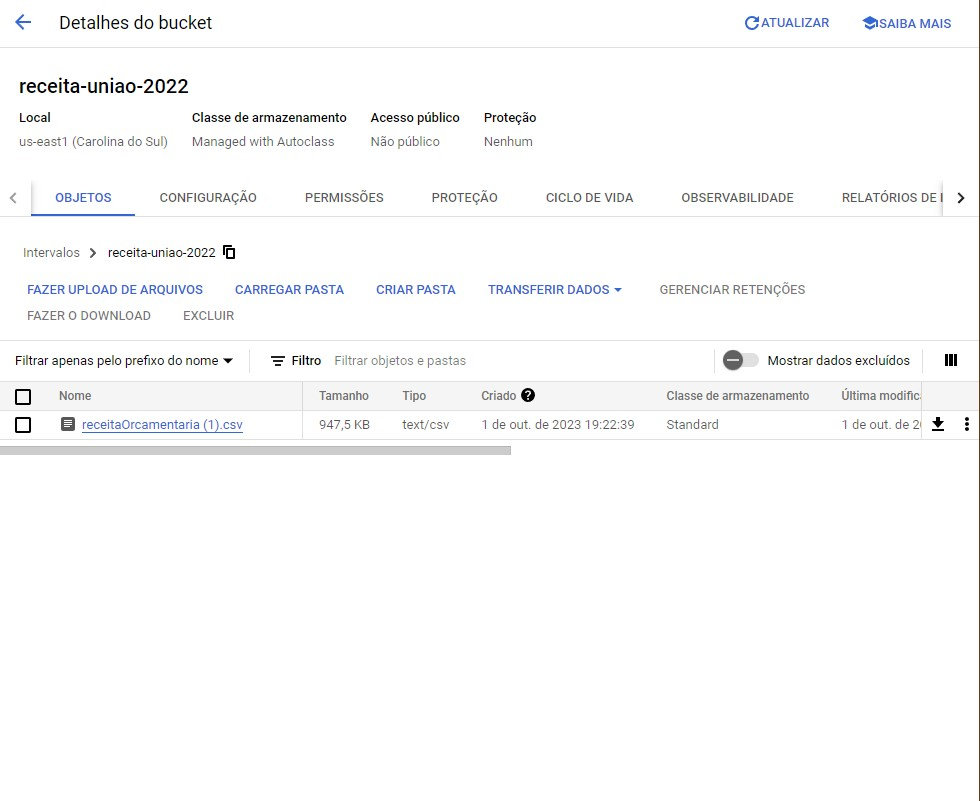


O dataset coletado para o ano de 2022 possui originalmente 10 colunas, sendo elas:
<br>**A) ano:** trata-se do ano de referência </br>
<br>**B) Órgão Superior:** coluna com dados categóricos, dividida entre os 252 órgãos superiores da União Federal que possuem ou já possuíram fonte de receita para arrecadação</br>
<br>**C) Órgão:** coluna com dados categóricos contendo as instituições subordinadas aos órgãos superiores da União Federal. Possuem um relacionamento de subordinação às chaves da coluna **Órgão Superior** </

---

br>
<br>**D) Unidade Gestora:** coluna com dados categóricos detalhando as unidades de gestão subordinadas às chaves da coluna **"Órgão"**</br>
<br>**E) Categoria:** coluna categórica reunindo os tipos gerais de Receita</br>
<br>**F) Origem:** coluna categórica contendo o segundo detalhamento dos tipos de receitas orçamentárias, subordinada às categorias da coluna **Categoria** </br>
<br>**G) Espécie:** coluna com dados categóricos contendo as subcontas orçamentárias das subcategorias da coluna **Origem**</br>
<br>**H) Detalhamento:** colunas com dados categóricos contendo subcontas subordinadas às chaves da coluna **Espécie**</br>
<br>**I) Valor LOA:** valores numéricos discretos determinando o orçamento estipulado para cada uma das entradas da coluna **Espécie**</br>
<br>**J) Valor Atualizado:** valores numéricos contendo valores em relação à publicação da LOA </br>

---

Já o dataset das Receitas de 2023, possui as mesmas colunas acima, com 3 colunas adicionais:

<br>**K) Receita Realizada (Valor Arrecadado):** valores numéricos contendo valores realizados vis-à-vis os valores previstos no orçamento </br>

<br>**L) % Previsto:** valores numéricos. Divisão por linha dos Valores projetados no orçamento sobre os valores efetivamente arrecadados </br>

<br>**M) Valor Lançado:** valores númericos negativos que provavelmente fazem parte de conciliação do orçamento como um todo, perdendo o significado no contexto de análise somente das contas de receita </br>

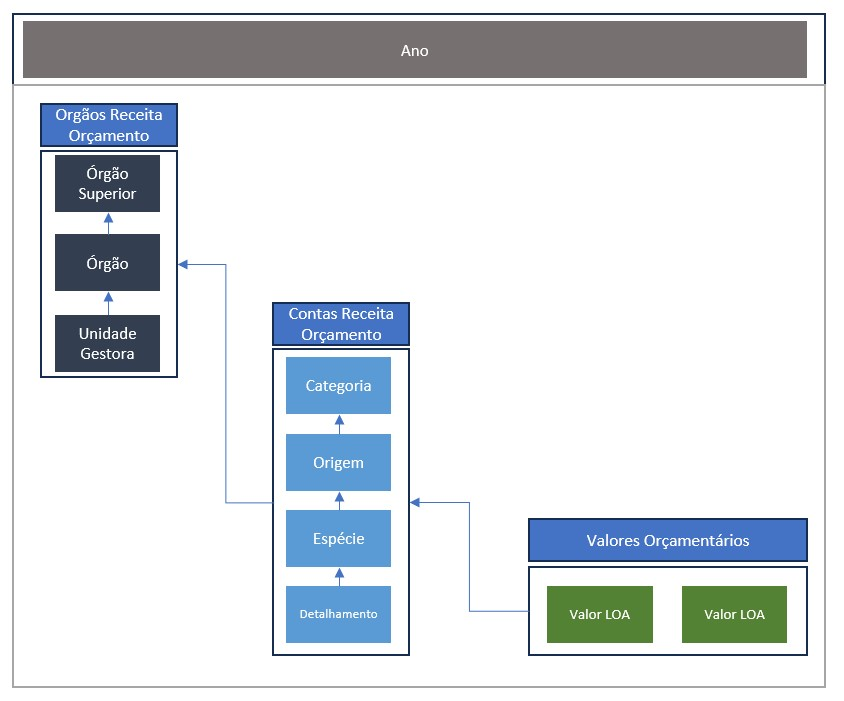

Após realizar a carga dos dados no Bucket do projeto da Google Cloud, utilizei o **Dataprep** para fazer a exploração e modelagem dos dados dos datasets carregados.

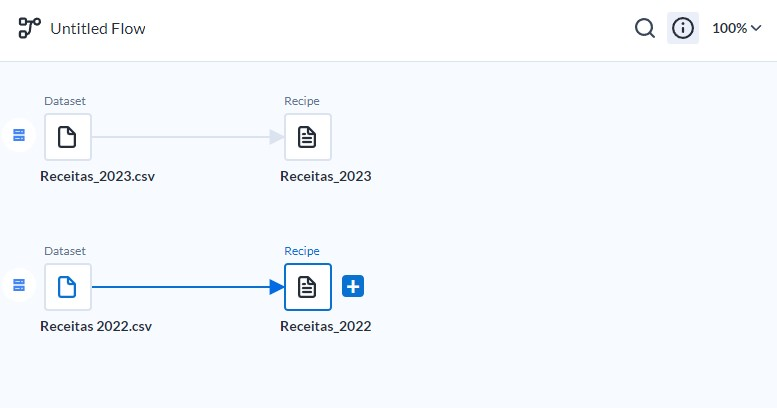



Com o intuito de igualar as dimensões para os anos de 2023, retirei as colunas excedentes deste perante ao dataset de 2022. Desta forma, ambas as tabelas ficaram com o mesmo # de colunas.

Para as colunas contendo unicamente valores referentes às rubricas das subcontas, substituí os caracteres "." por " ", e os caracteres de "," por ".", a fim de adequar ao sistema de números internacional para, posteriormente, poder converter as entradas destas colunas para o formato float.
Todas as demais colunas mantive como strings.

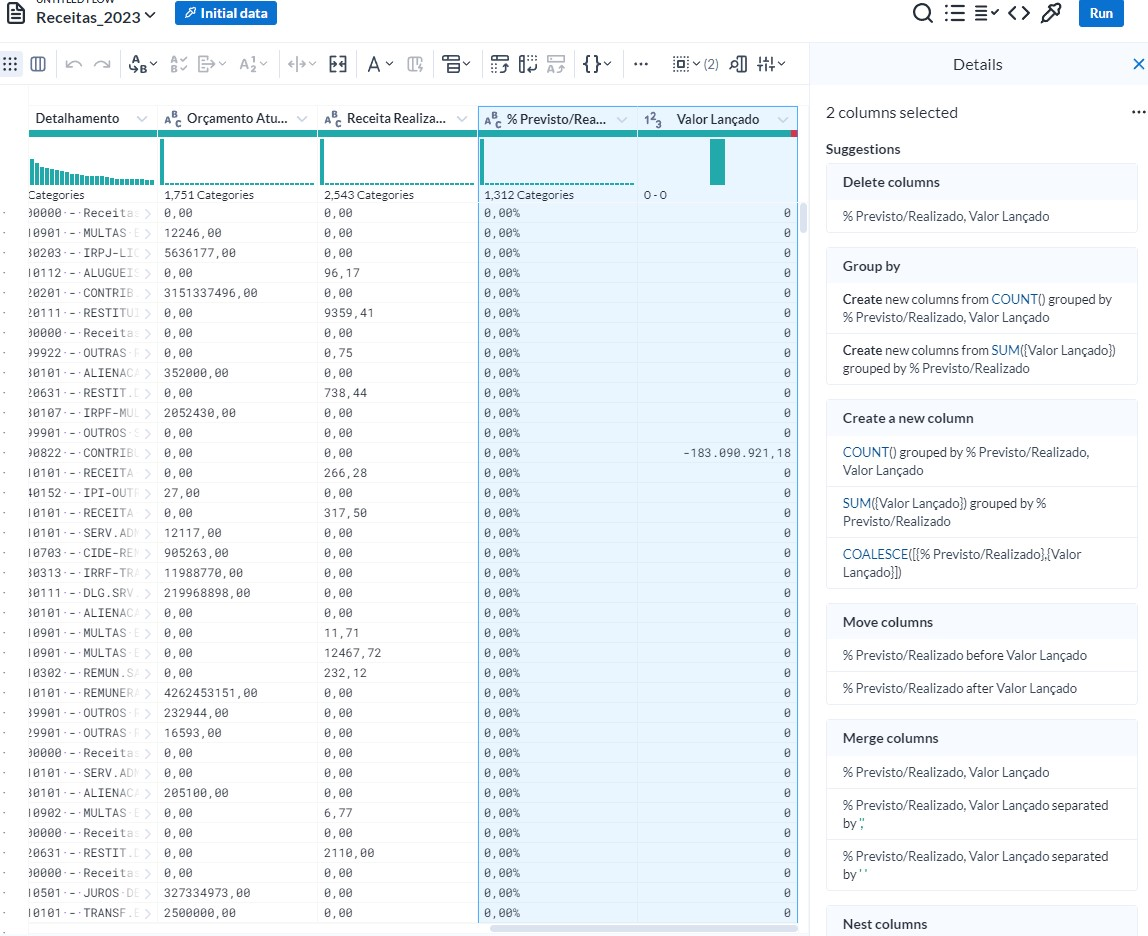

Utilizei o método de **UNION** no ambiente do **Dataprep** para consolidar as tabelas referentes aos anos de 2022 e 2023.


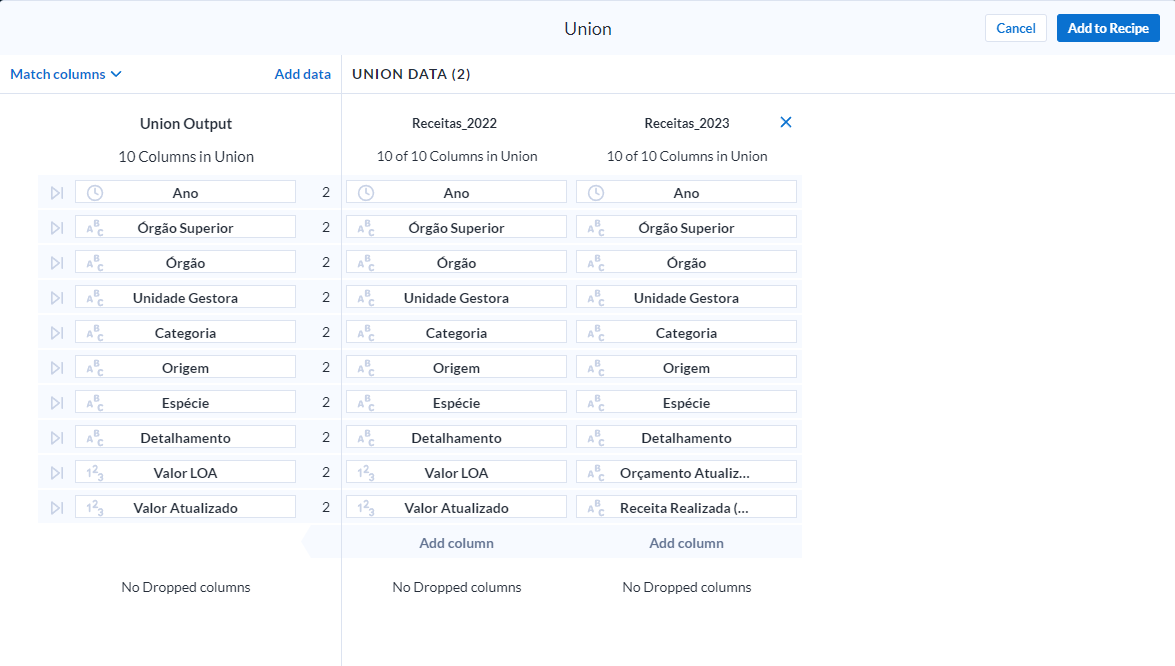

Após a consolidação dos datasets referentes aos anos de 2022-23, inseri um Output no pipeline executado pelo **Dataflow**, como produto para uso posterior nas análises pretendidas.

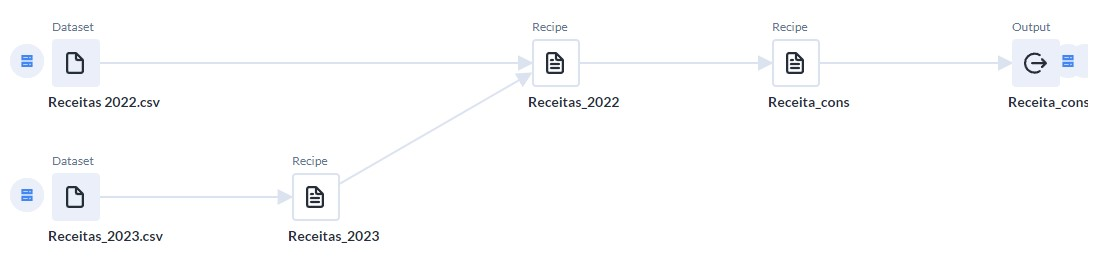

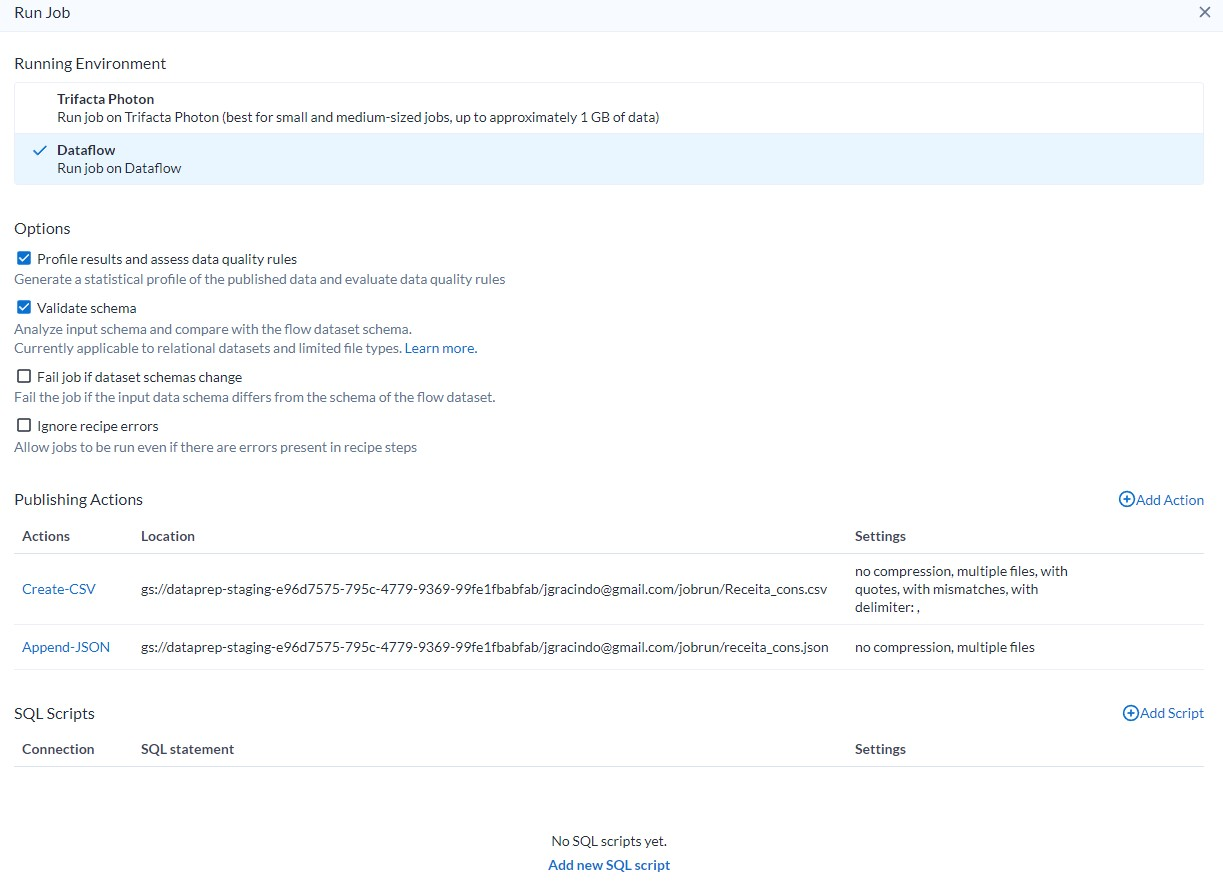

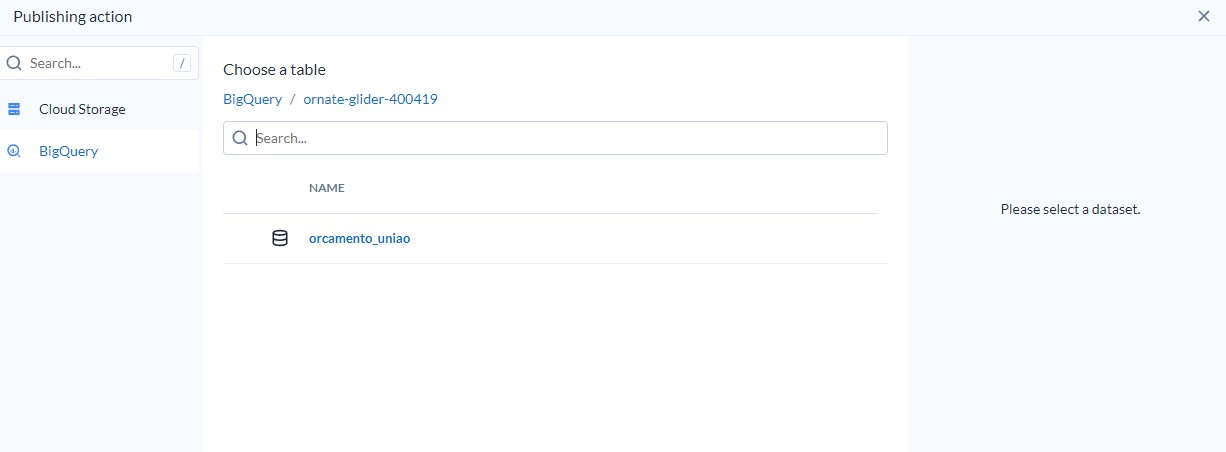

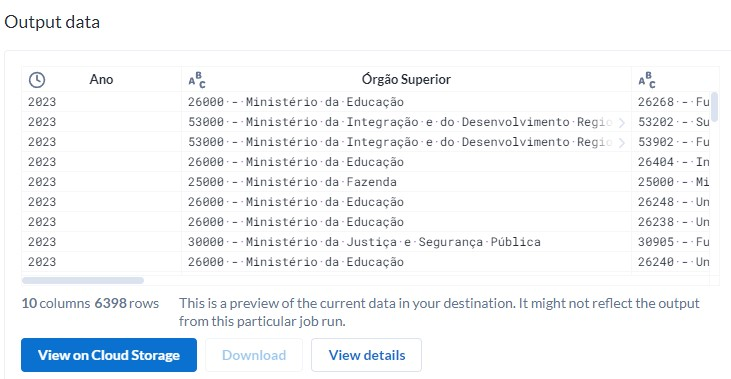

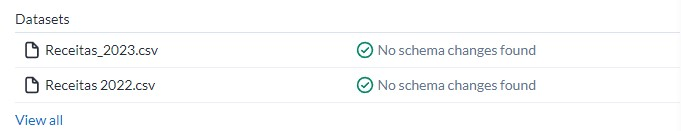

Utilizei a biblioteca Python para realizar a análise da tabela após a consolidação, importando o arquivo .csv resultante e realizando a análise com os pacotes panda, seaborn, matplotlib.pyplot para realizar as análises, chegando às seguintes diferenças principais em termos de ordem de grandeza:



1.   Da queda de R$ 1,592 bi do orçamento de Receitas Totais, os Ministérios da Fazenda (72,6%)  e da Previdência Social (16,0%), apresentaram as maiores quedas relativas.

2.   Para o Ministério da Fazenda, as receitas de capital representaram a maior queda na comparação vis-à-vis. Para o Ministério da Previdência Social a queda nas Contribuições foi o maior vetor de diminuição para a Receita projetada.



# Avaliação Geral

Os conjuntos de dados não possuem problemas em si, mas a coluna "Valor Lançado" contida no dataset das Receitas de 2023, ficou descontextualizada do resto das colunas.

A maioria dos dados foi utilizada como string, a não ser pelas colunas "Ano" e "Valor_LOA".

Como auto-avaliação, aloquei muito tempo tentando entender a dinâmica do Google Cloud, até encontrar o Dataprep, que serviu perfeitamente para o propósito do trabalho. Pela dificuldade no uso da ferramenta Google Cloud, a minha análise final acabou sendo muito superficial em virtude de tempo disponível, e muito aquém das análises realizadas nos MVPs anteriores.